In [ ]:
# Installing needed libraries

# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
!wget -q https://github.com/creotiv/computer_vision/raw/master/resources.tar.gz -O resources.tar.gz
!tar xzf resources.tar.gz                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
!ls -la

     |████████████████████████████████| 28.3MB 140kB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.3.1+cu100 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
total 796
drwxr-xr-x 1 root root   4096 Jan 14 12:02 .
drwxr-xr-x 1 root root   4096 Jan 14 12:00 ..
drwxr-xr-x 1 root root   4096 Jan  8 16:41 .config
drwxrwxr-x 5 1000 1000   4096 Mar 13  2018 resources
-rw-r--r-- 1 root root 791714 Jan 14 12:02 resources.tar.gz
drwxr-xr-x 1 root root   4096 Dec 18 16:52 sample_data


In [ ]:
import cv2
import numpy as np
import scipy
from scipy.misc import imread
import pickle 
#  import cPickle as pickle
import random
import os
import matplotlib.pyplot as plt

In [ ]:
# Feature extractor
def extract_features(image_path, vector_size=32):
    image = imread(image_path, mode="RGB")
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print 'Error: ', e
        return None

    return dsc


def batch_extractor(images_path, pickled_db_path="features.pck"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        print 'Extracting features from image %s' % f
        name = f.split('/')[-1]
        result[name] = extract_features(f)
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'w') as fp:
        pickle.dump(result, fp)

In [ ]:
class Matcher(object):

    def __init__(self, pickled_db_path="features.pck"):
        with open(pickled_db_path) as fp:
            self.data = pickle.load(fp)
        self.names = []
        self.matrix = []
        for k, v in self.data.iteritems():
            self.names.append(k)
            self.matrix.append(v)
        self.matrix = np.array(self.matrix)
        self.names = np.array(self.names)

    def cos_cdist(self, vector):
        # getting cosine distance between search image and images database
        v = vector.reshape(1, -1)
        return scipy.spatial.distance.cdist(self.matrix, v, 'cosine').reshape(-1)

    def match(self, image_path, topn=5):
        features = extract_features(image_path)
        img_distances = self.cos_cdist(features)
        # getting top 5 records
        nearest_ids = np.argsort(img_distances)[:topn].tolist()
        nearest_img_paths = self.names[nearest_ids].tolist()

        return nearest_img_paths, img_distances[nearest_ids].tolist()

batch_extractor
Query image ============/content/my_data/14190924-1050-2020-01-09_03-06-11_1.jpg===============


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


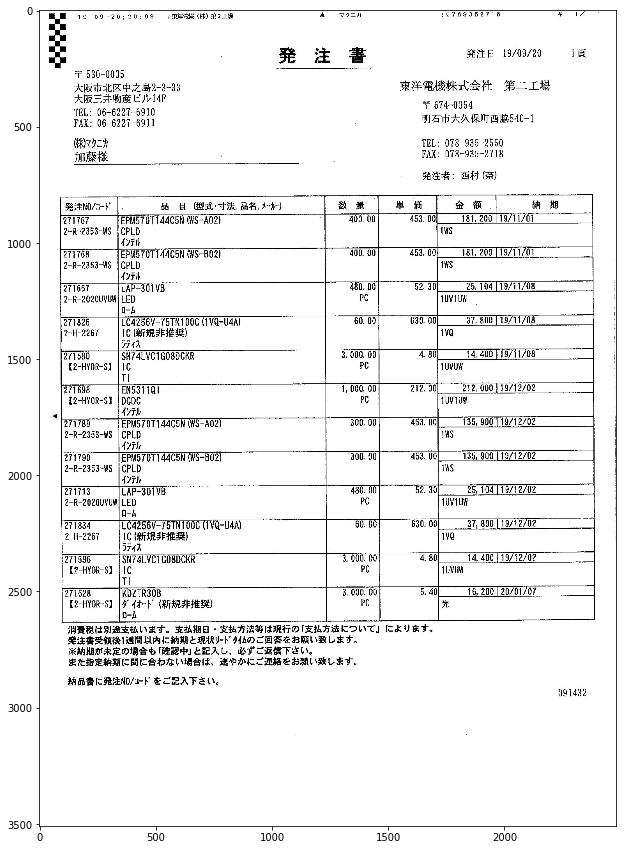

Result images ================['14190924-1050-2020-01-09_03-06-11_1.jpg', '15190517-1054-2020-01-09_03-06-12_2.jpg', '2190403-1625-2020-01-08_09-54-48.jpg', '1190423-1055-2020-01-09_03-06-15.jpg', '36612191202-1624-2020-01-09_03-06-05.jpg']================
Match 1.0


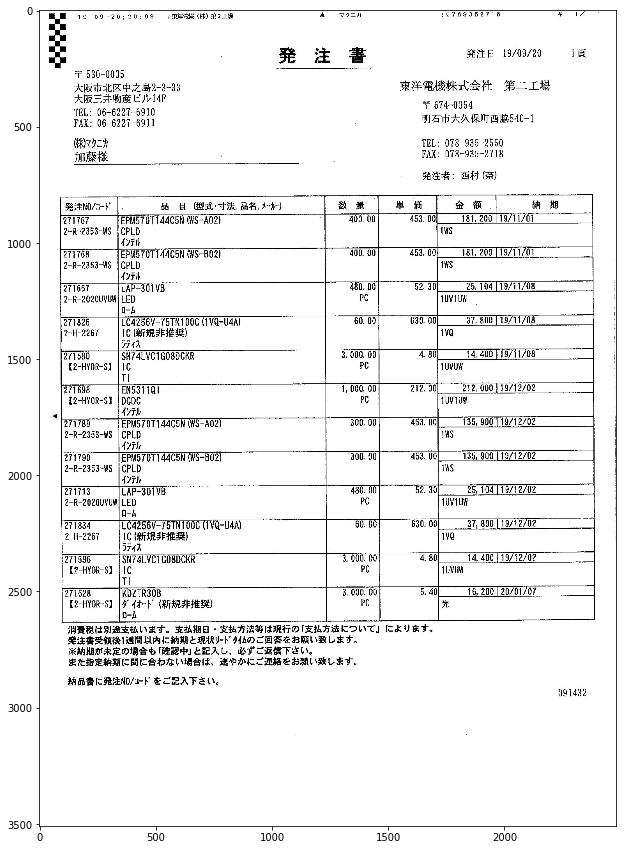

Match 0.829090362297


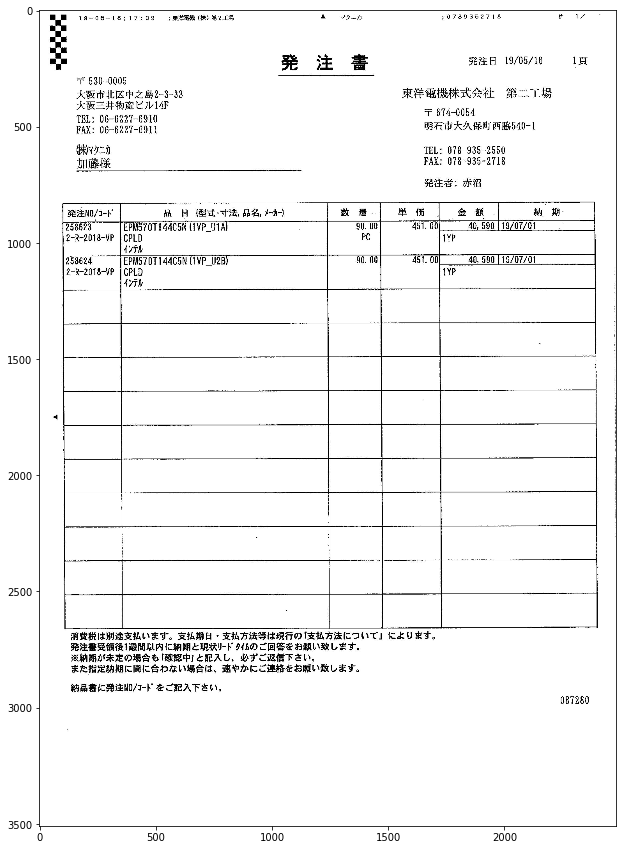

Match 0.821771697646


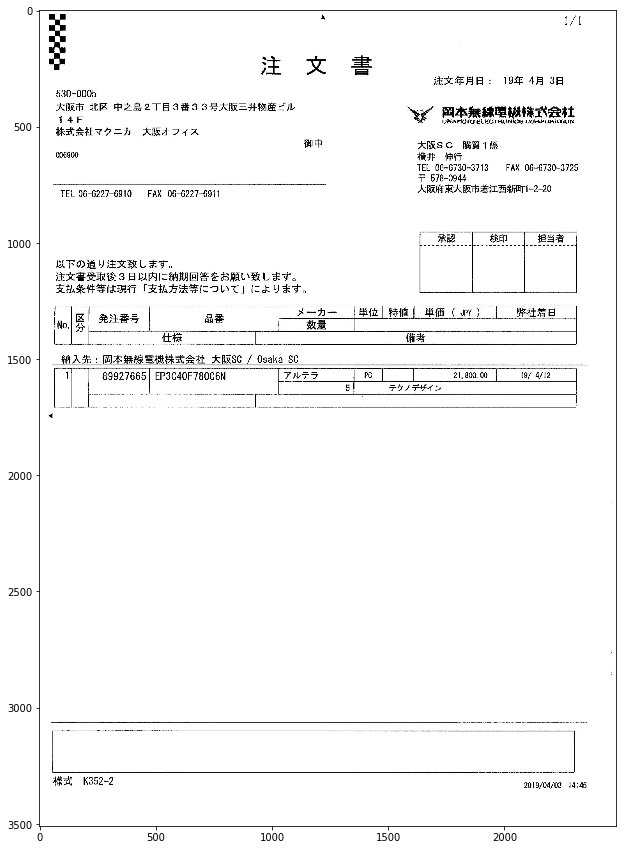

Match 0.818710424832


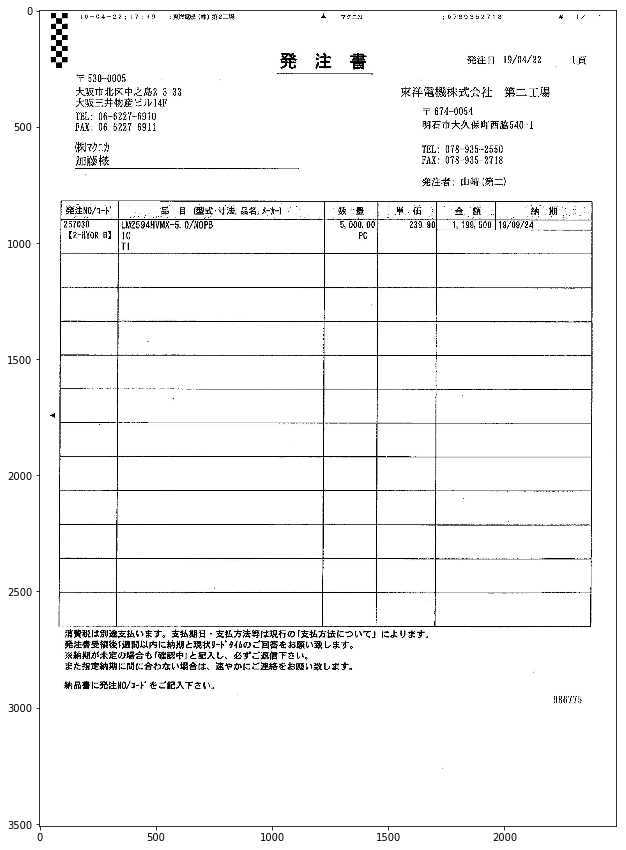

Match 0.816345245588


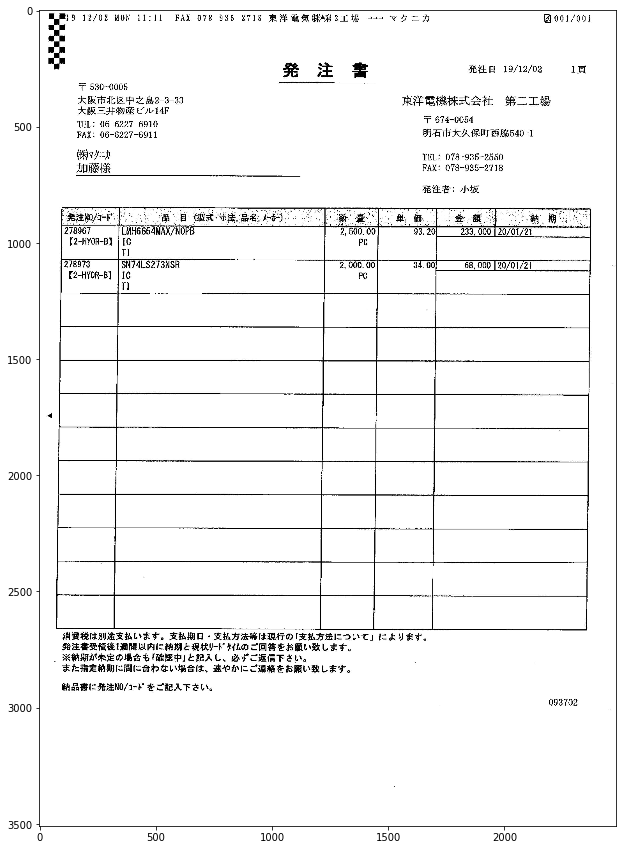

Query image ============/content/my_data/366118191120-1620-2020-01-09_03-06-03_1.jpg===============


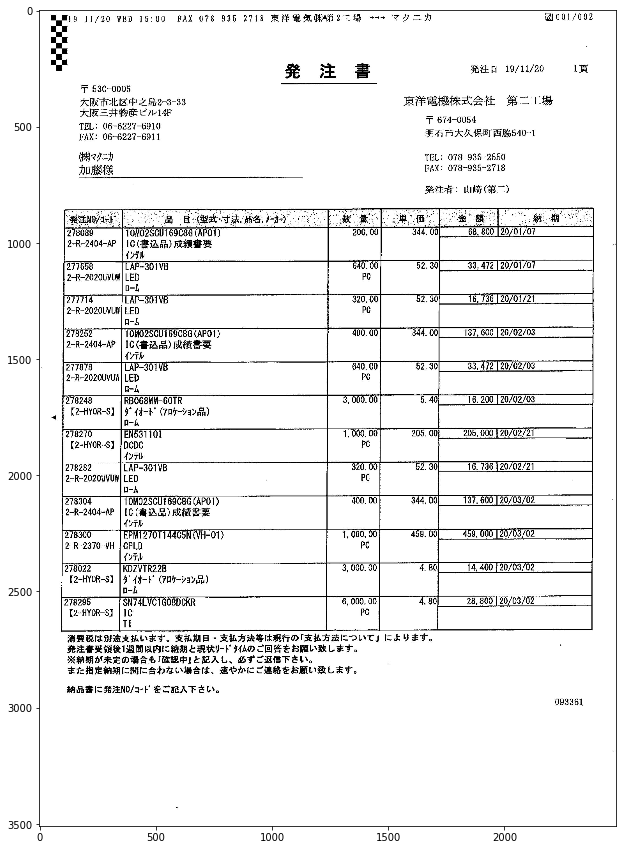

Result images ================['366118191120-1620-2020-01-09_03-06-03_1.jpg', '3190826-1624-2020-01-09_03-06-19.jpg', '11191021-1108-2020-01-09_03-06-10_1.jpg', '1190930-1630-2020-01-08_09-54-14.jpg', '3190827-1051-2020-01-09_03-06-19.jpg']================
Match 1.0


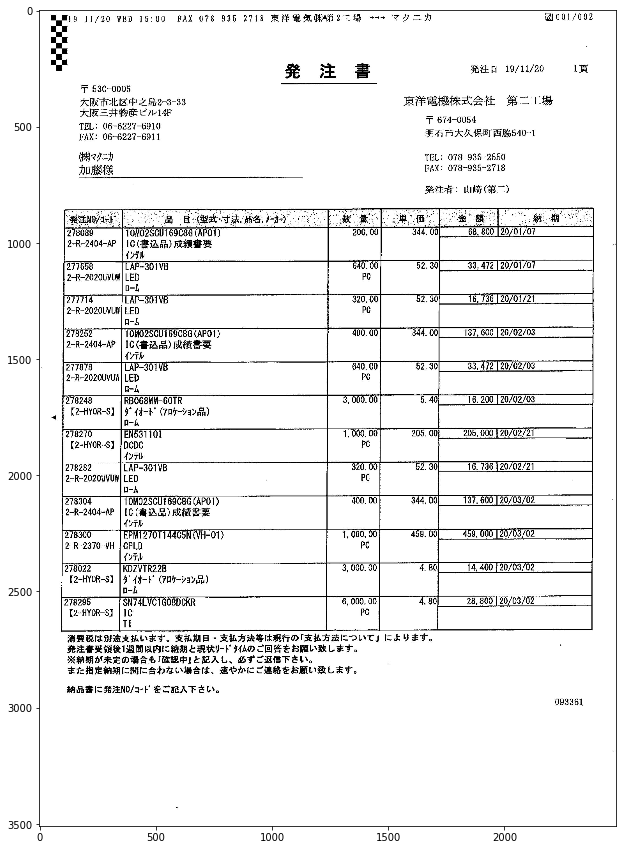

Match 0.827269020885


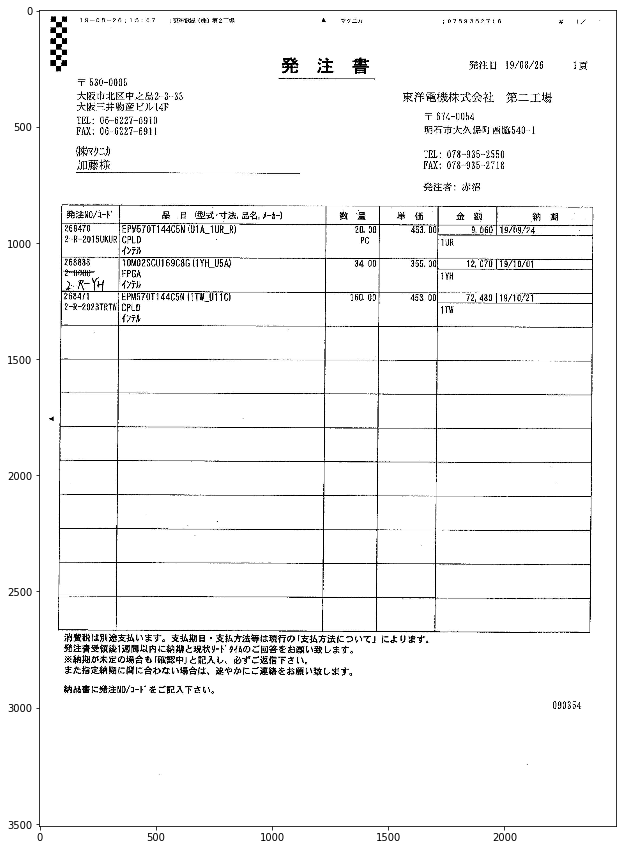

Match 0.825909473066


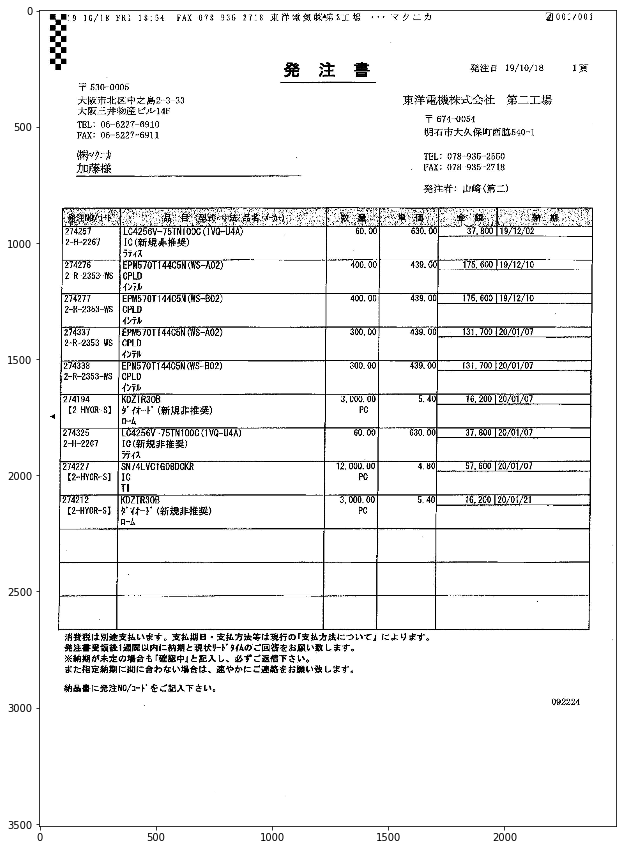

Match 0.820201315415


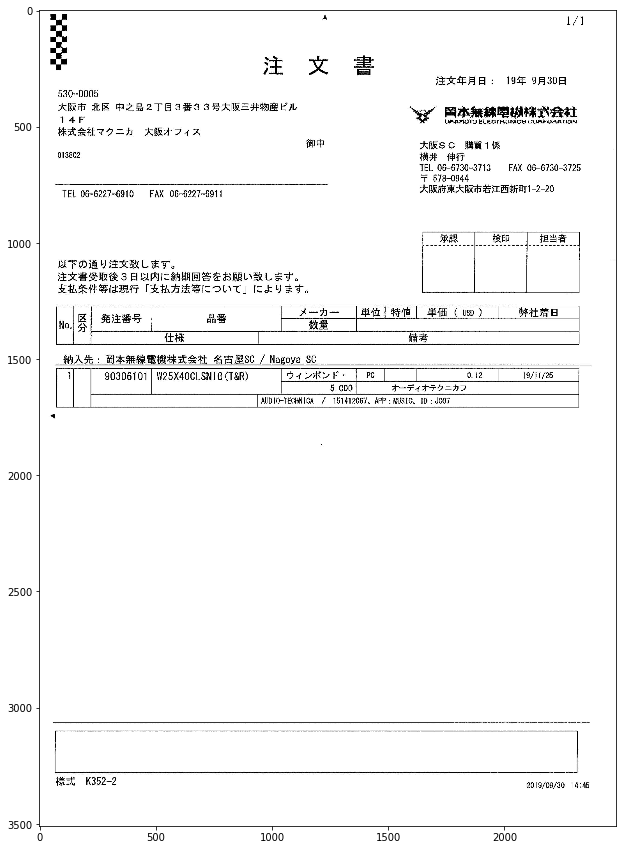

Match 0.819817088688


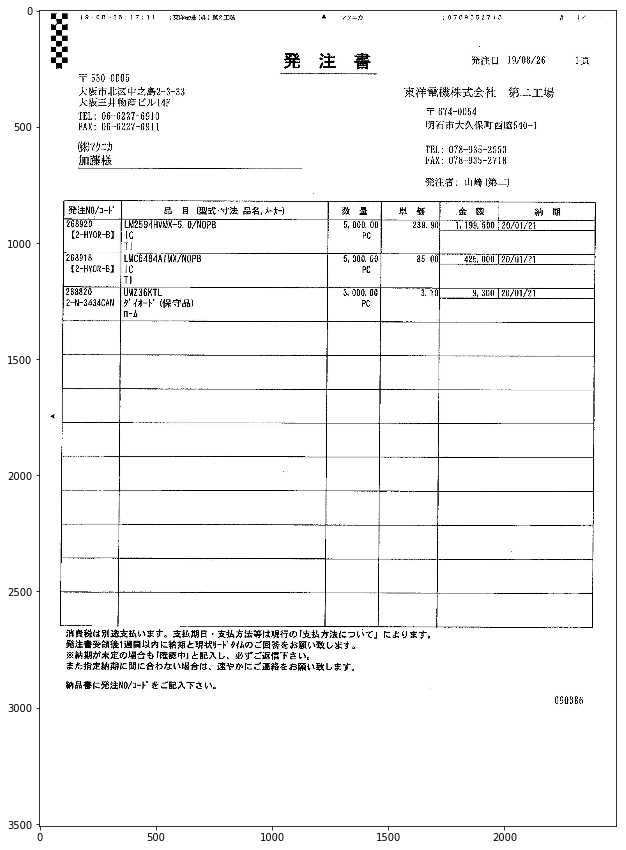

Query image ============/content/my_data/Document-page-001.jpg===============


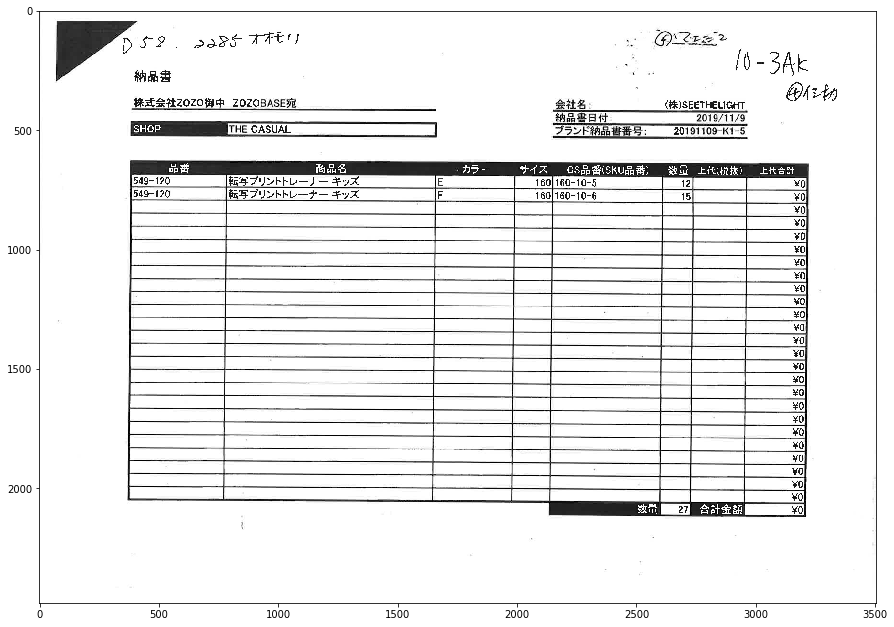

Result images ================['Document-page-001.jpg', '\xc3\xa7\xc3\xa8\xc3\xa2t\xc3\xa2\xc3\xae\xc3\xa2C\xc3\xa2\xc3\xb6\xc3\xa2@(JIGGYS SHOP)-page-009.jpg', '\xc3\xa7\xc3\xa8\xc3\xa2t\xc3\xa2\xc3\xae\xc3\xa2C\xc3\xa2\xc3\xb6\xc3\xa2@(JIGGYS SHOP)-page-010.jpg', '\xc3\xa7\xc3\xa8\xc3\xa2t\xc3\xa2\xc3\xae\xc3\xa2C\xc3\xa2\xc3\xb6\xc3\xa2@(JIGGYS SHOP)-page-006.jpg', '\xc3\xa7\xc3\xa8\xc3\xa2t\xc3\xa2\xc3\xae\xc3\xa2C\xc3\xa2\xc3\xb6\xc3\xa2@(JIGGYS SHOP)-page-003.jpg']================
Match 1.0


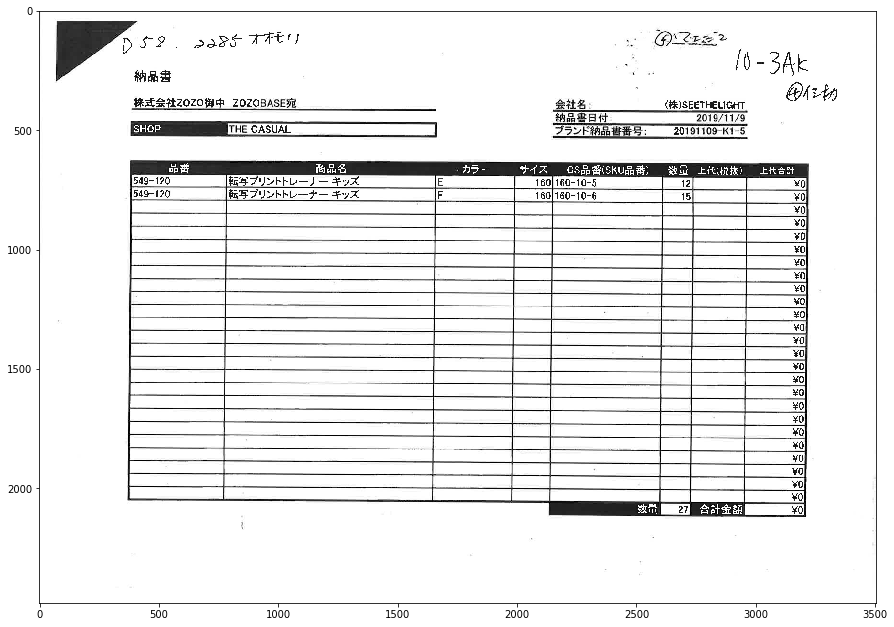

Match 0.837941150806


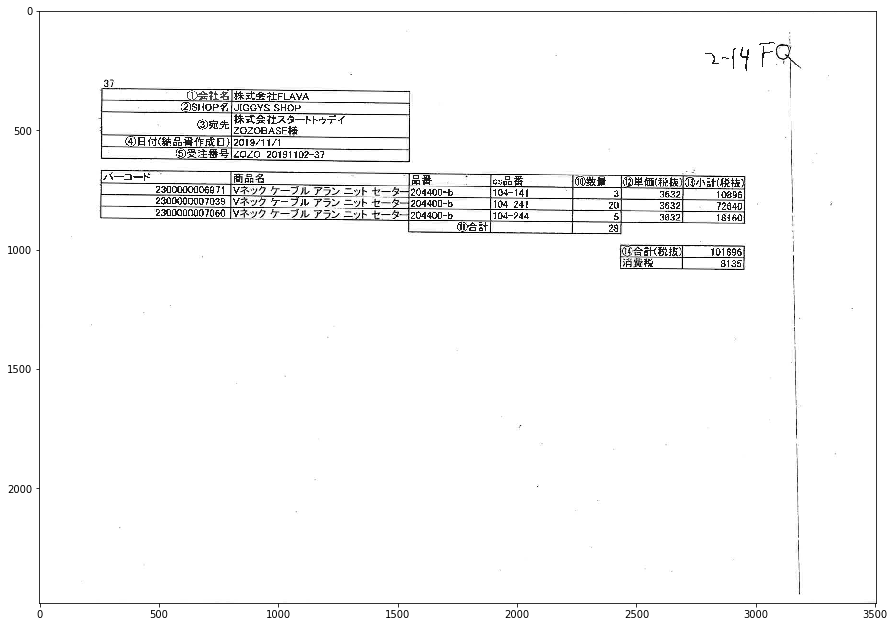

Match 0.83520418128


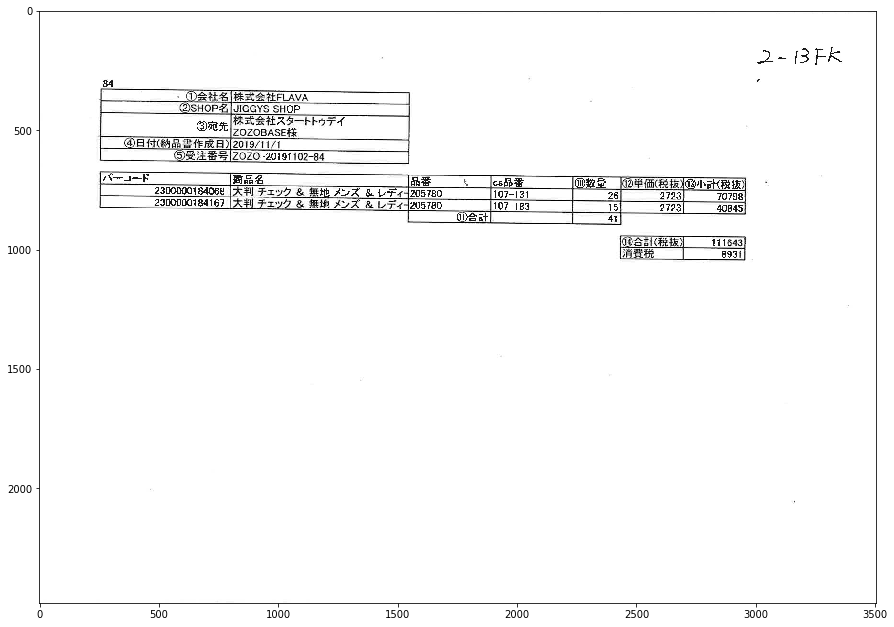

Match 0.83203787733


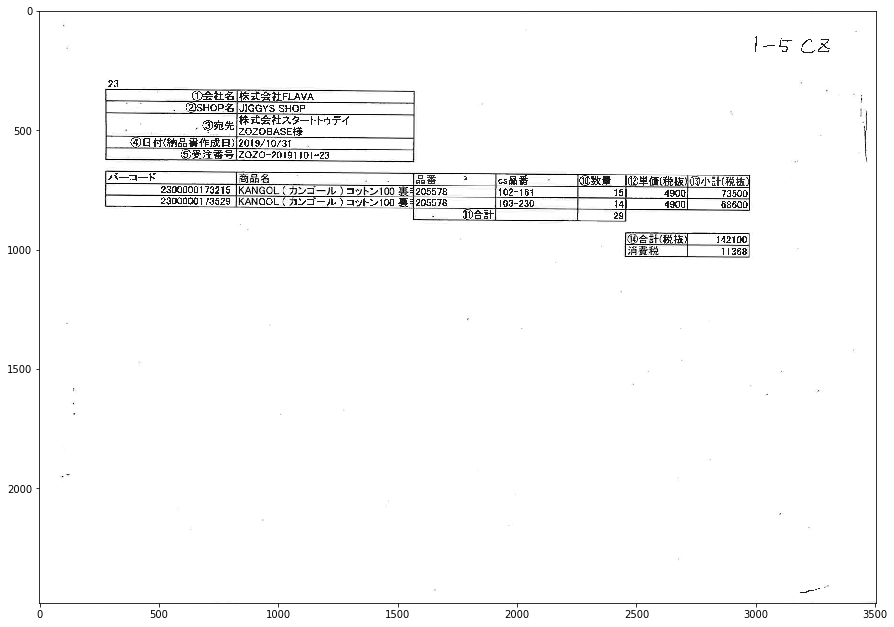

Match 0.83118925644


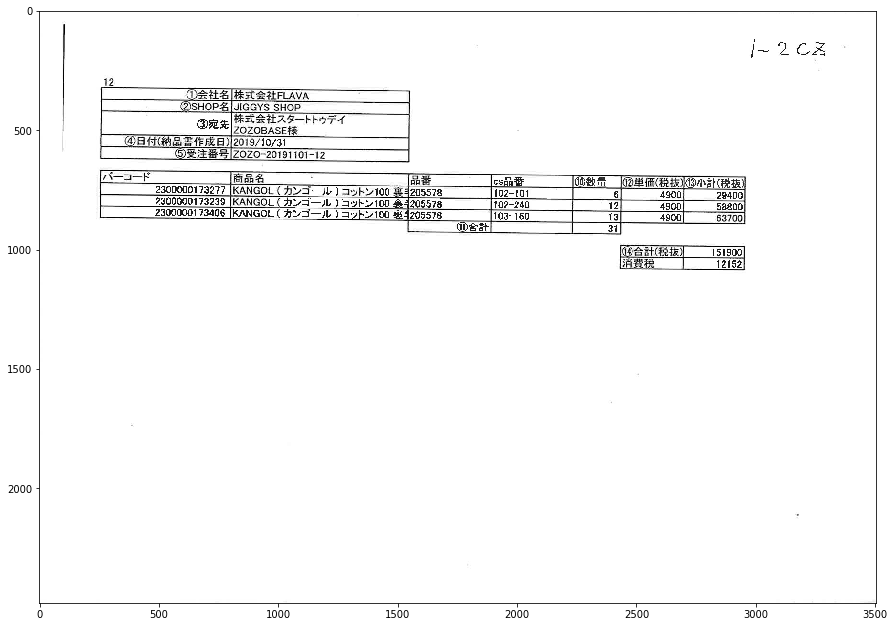

Query image ============/content/my_data/2191007-1049-2020-01-10_01-14-22.jpg===============


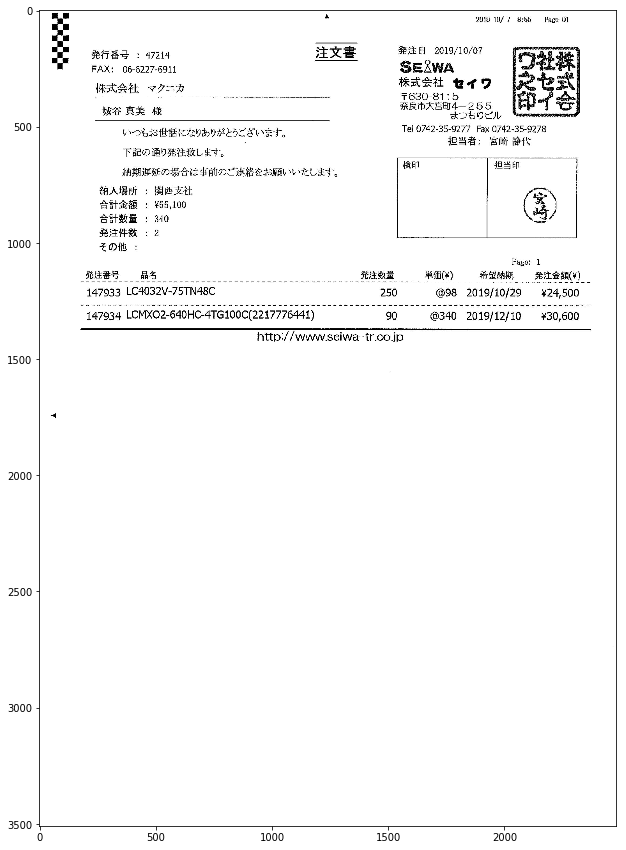

Result images ================['2191007-1049-2020-01-10_01-14-22.jpg', '2191007-1049-2020-01-10_02-57-36.jpg', '2191007-1049-2020-01-10_02-58-14.jpg', '2191007-1049-2020-01-10_01-11-41.jpg', '2191007-1049-2020-01-09_08-41-35.jpg']================
Match 1.0


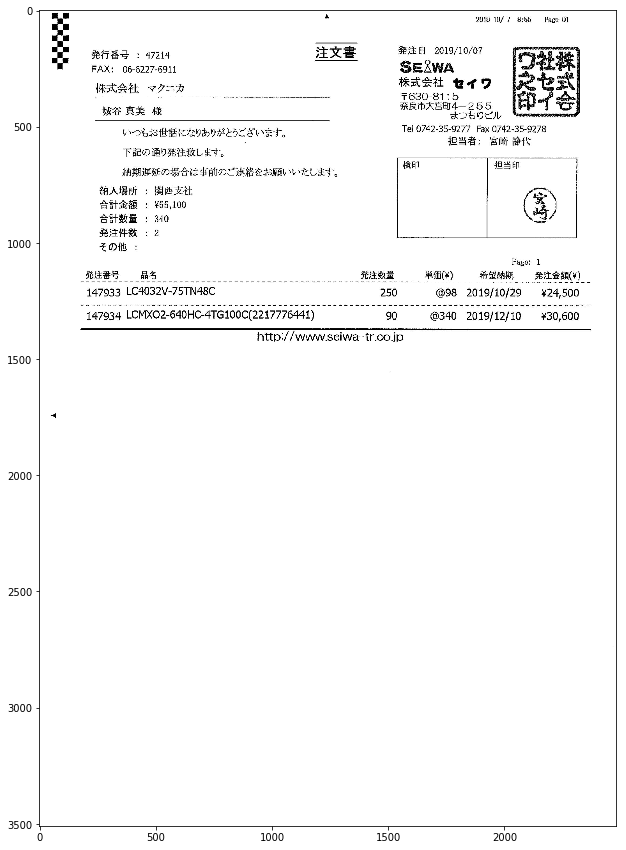

Match 1.0


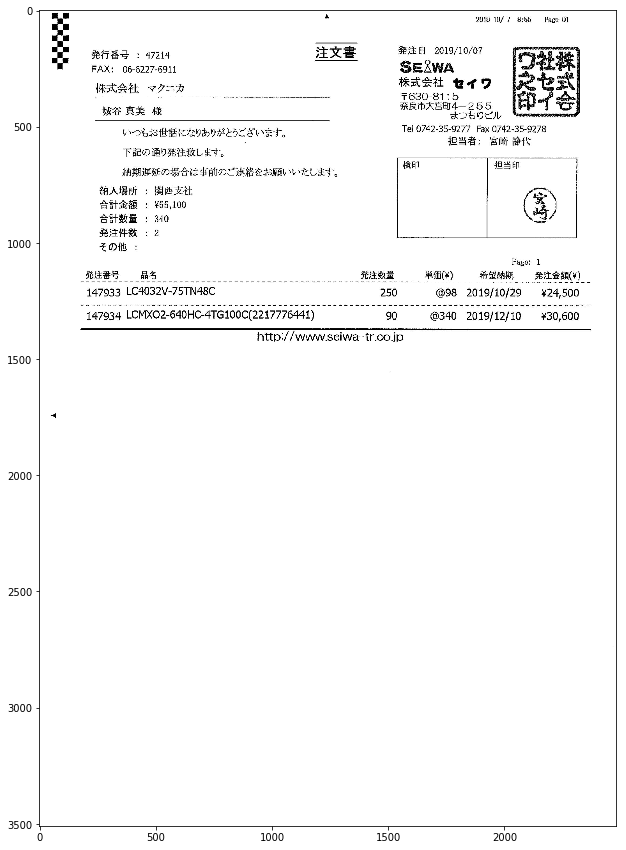

Match 1.0


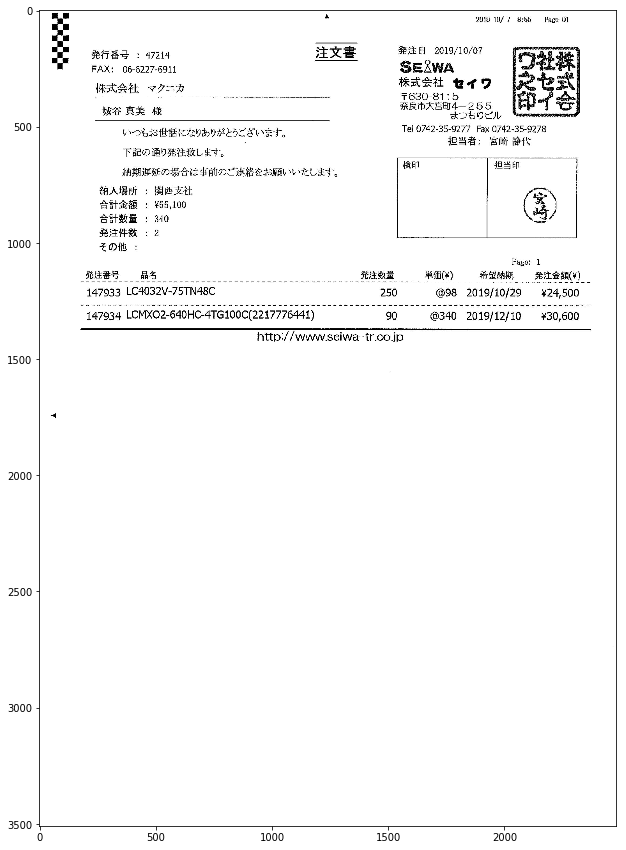

Match 1.0


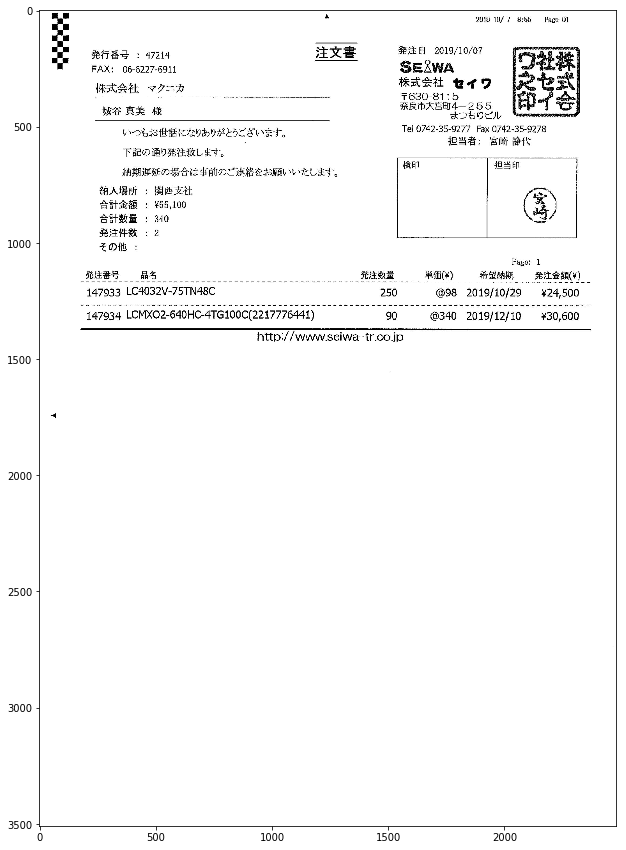

Match 1.0


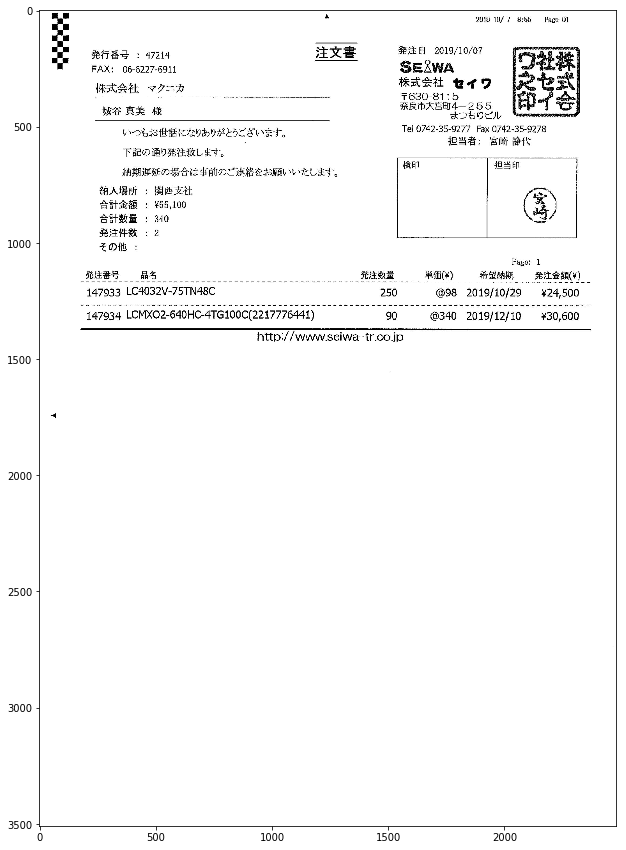

Query image ============/content/my_data/11191021-1108-2020-01-09_03-06-10_1.jpg===============


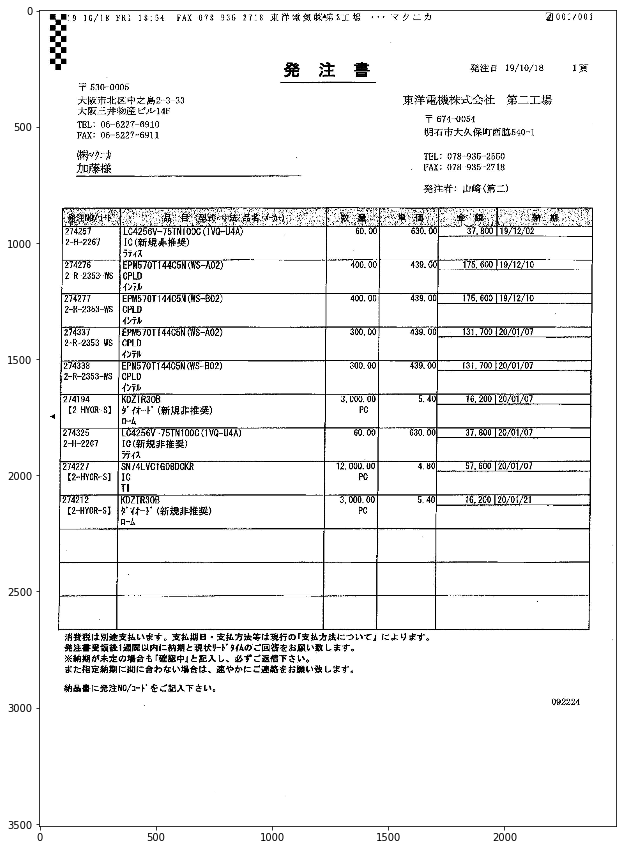

Result images ================['11191021-1108-2020-01-09_03-06-10_1.jpg', '36612191202-1624-2020-01-09_03-06-05.jpg', '15190517-1054-2020-01-09_03-06-12_2.jpg', '366118191120-1620-2020-01-09_03-06-03_1.jpg', 'Sample_02_02-page1.jpg']================
Match 1.0


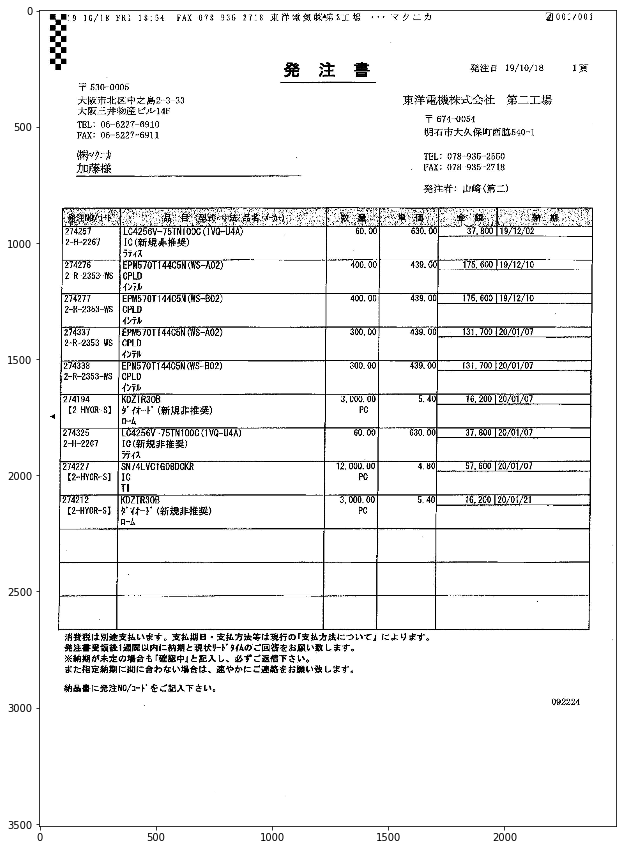

Match 0.853408367759


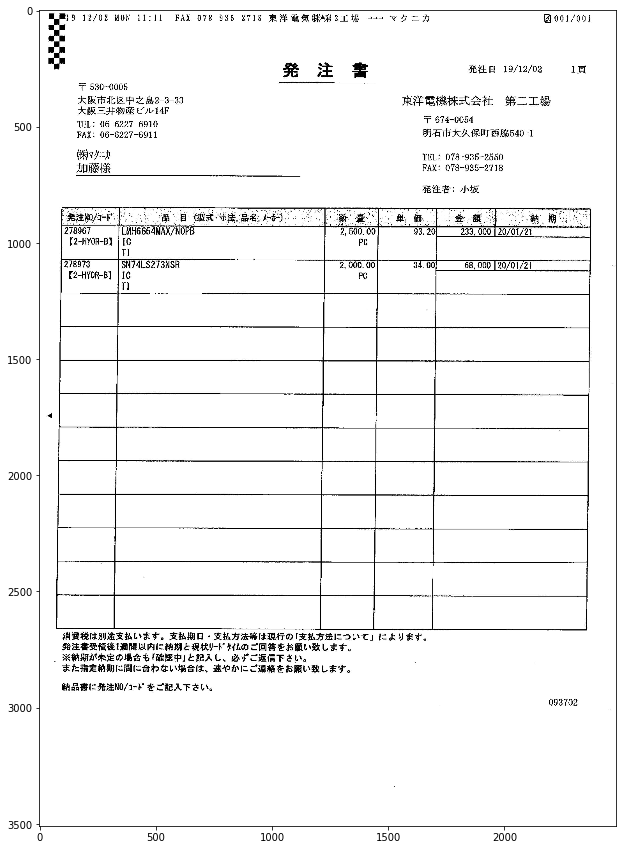

Match 0.82773275931


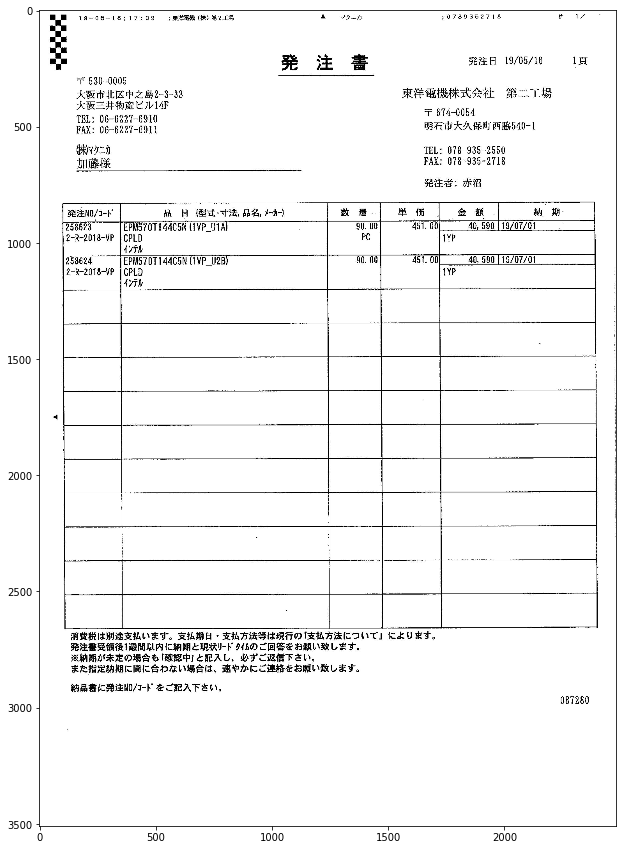

Match 0.825909473066


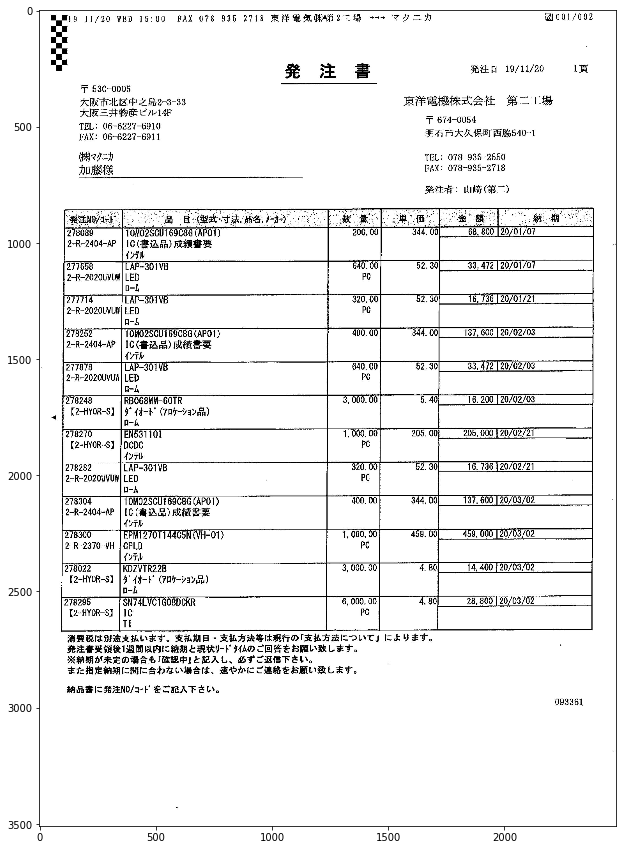

Match 0.81863472495


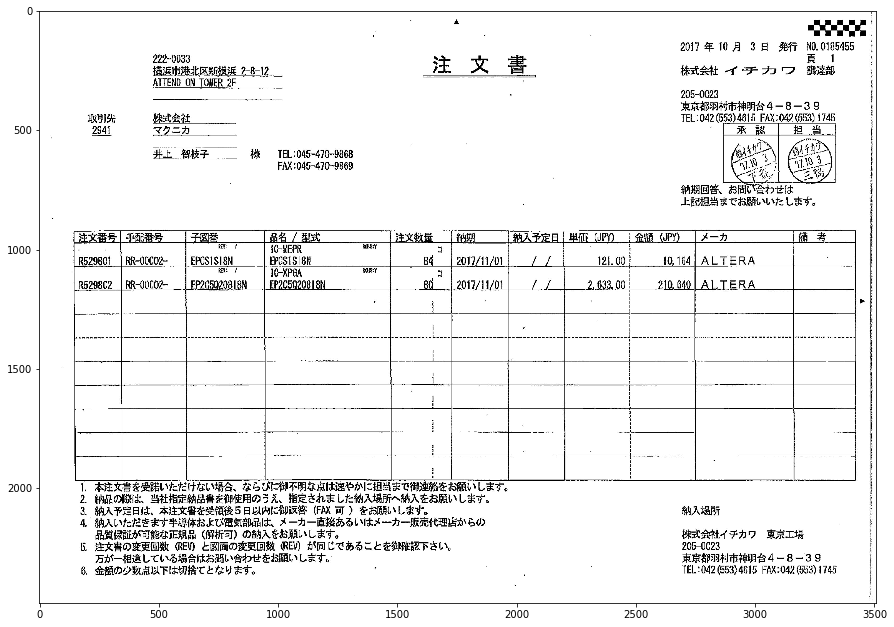

In [ ]:
def show_img(path):
    img = imread(path, mode="RGB")
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()
    
def run():
    images_path = '/content/my_data/'
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]
    # getting 3 random images 
    sample = random.sample(files, 5)
    print('batch_extractor')
    # batch_extractor(images_path)

    ma = Matcher('features.pck')
    
    for s in sample:
        print 'Query image ============%s==============='%s
        show_img(s)
        names, match = ma.match(s, topn=5)
        print 'Result images ================%s================'%names
        for i in range(5):
            # we got cosine distance, less cosine distance between vectors
            # more they similar, thus we subtruct it from 1 to get match value
            print 'Match %s' % (1-match[i])
            show_img(os.path.join(images_path, names[i]))

run()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
images_path = '/content/my_data/'
files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

In [ ]:
files

['/content/my_data/02SEIWA-2020-01-09_08-47-29.png',
 '/content/my_data/14190924-1050-2020-01-09_03-06-11_1.jpg',
 '/content/my_data/2190614-1643-2020-01-09_03-06-16.jpg',
 '/content/my_data/33631191101-1634-2020-01-08_02-17-42.jpg',
 '/content/my_data/33636191211-1632-2020-01-08_04-55-52.jpg',
 '/content/my_data/Document-page-005.jpg',
 '/content/my_data/Document-page-016.jpg',
 '/content/my_data/PDFtoJPG.me-04.jpg',
 '/content/my_data/PDFtoJPG.me-38.jpg',
 '/content/my_data/Sample_02_02-page2.jpg',
 '/content/my_data/Sample_02_06-page0.jpg',
 '/content/my_data/Sample_03_01-page2.jpg',
 '/content/my_data/Sample_03_02-page2.jpg',
 '/content/my_data/wwwwwww-2020-01-10_04-09-40.jpeg',
 '/content/my_data/\xc3\xa7\xc3\xa8\xc3\xa2t\xc3\xa2\xc3\xae\xc3\xa2C\xc3\xa2\xc3\xb6\xc3\xa2@(JIGGYS SHOP)-page-005.jpg',
 '/content/my_data/\xc3\xa7\xc3\xa8\xc3\xa2t\xc3\xa2\xc3\xae\xc3\xa2C\xc3\xa2\xc3\xb6\xc3\xa2@(JIGGYS SHOP)-page-015.jpg']

In [ ]:
!git clone https://github.com/faustomorales/keras-ocr.git

In [ ]:
# To install from master
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr


# !python /content/keras-ocr/setup.py
# To install from PyPi
!pip install keras-ocr

/usr/local/lib/python2.7/dist-packages/setuptools/dist.py:476: UserWarning: Normalizing '0.6.0.post.dev2' to '0.6.0.post0.dev2'
  normalized_version,
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied


In [ ]:
import cv2
import glob
import numpy as np


import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()


ImportError: ignored

In [ ]:
img_dir = "/home/kk/Desktop/"
imput_img_dir = [glob.glob(f"{img_dir}*{e}") for e in ['.jpg', '.png']][0]
print(imput_img_dir)
# glob.glob('/content/*.jpg')
images = [keras_ocr.tools.read(url) for url in imput_img_dir]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.

#images are numpy array
prediction_groups = pipeline.recognize(images)


def drow_rectangle_box(img_array, xmin_ymin, xmax_ymax):
    image = np.copy(img_array)
    for a, b in zip(xmin_ymin, xmax_ymax):
        image = cv2.rectangle(image,a,b,[0,255,2],2)
    return image


def convert_poins(prediction_groups):
    xmin_ymin = []
    xmax_ymax = []
    for multi_pt in prediction_groups:
        for single_pt in multi_pt:
            xmin_ymin.append(tuple(single_pt[1][0]))
            xmax_ymax.append(tuple(single_pt[1][2]))
    return xmin_ymin ,xmax_ymax



for inx, img_path in enumerate(imput_img_dir):
    a, b= convert_poins([prediction_groups[inx]])
    img = cv2.imread(img_path)
    img = drow_rectangle_box(img ,a, b)

    plt.figure(figsize=(30, 30))
    plt.imshow(img)